# Possible Binaries among Low-Mass Stars in NGC 2516

Exploring how the data lines up against the study of Irwin et al. (2007), who identified a binary sequence in various CMDs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [2]:
ngc2516 = np.genfromtxt('data/ngc2516_Christophe_v3.dat') # data for this study from J&J (2012)
irwin01 = np.genfromtxt('data/irwin2007.phot')            # data from Irwin+ (2007)

Plot $(V - I_C)$ CMDs for both data sets. Jackson, Jeffries, & Maxted (2009) apply a correction to the Irwin I-band data to homogenize zero points between the two studies. This correction takes the form $\Delta I = 0.080-0.0075\cdot I$. It was also noted in Jackson & Jeffries (2012) that a separate correction was made to colors, $\Delta(V-I_C) = 0.300 - 0.153\cdot(V-I_C)$. 

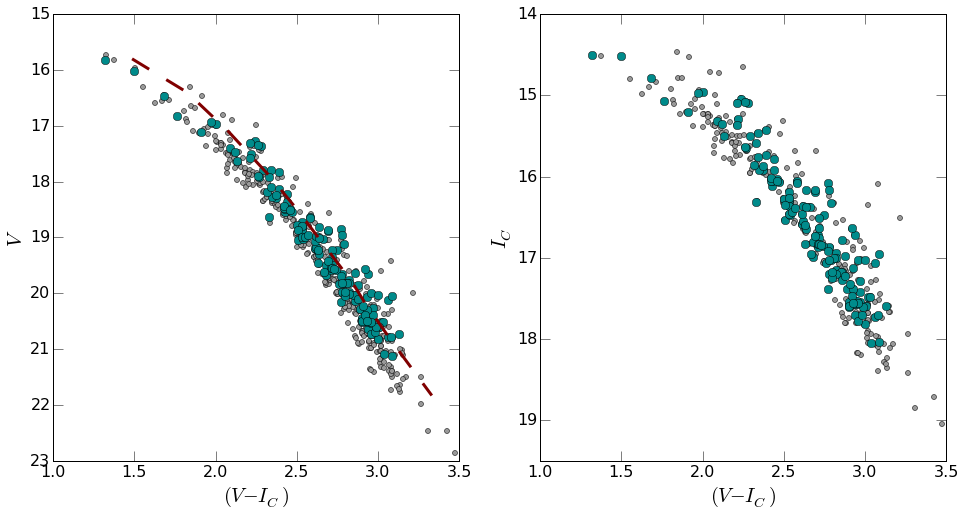

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.set_xlabel('$(V - I_C)$', fontsize=20.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_ylabel('$V$', fontsize=20.)
ax[1].set_ylabel('$I_C$', fontsize=20.)
ax[0].set_ylim(23., 15.)
ax[1].set_ylim(19.5, 14.)

# approximate "binary" sequence borders from Irwin+ (2007)
binary_domain = np.array([ 1.4,  1.8,  2.1,  2.4,  2.6,  3.0,  3.1,  3.3,  3.6])
binary_range  = np.array([15.8, 16.4, 17.1, 17.9, 18.5, 19.8, 20.2, 20.9, 21.9])

# testing curve smoothing
icurve = interp1d(binary_domain, binary_range, kind='slinear')
binary_domain = np.arange(1.4, 3.6, 0.02)
binary_range  = icurve(binary_domain)

# zero point corrections
DeltaI  = 0.080 - 7.6e-3*irwin01[:,8]
DeltaVI = 0.300 - 0.153*(irwin01[:,7] - irwin01[:,8])
binary_domain = binary_domain + (0.300 - 0.153*binary_domain)

ax[0].plot((irwin01[:,7] - irwin01[:,8] + DeltaVI), irwin01[:,7], 'o', lw=2, ms=5.0, c='#999999')
ax[0].plot((ngc2516[:,1] - ngc2516[:,2]), ngc2516[:,1], 'o', lw=2, ms=8.0, c='#008B8B')
ax[0].plot(binary_domain, binary_range, '-', lw=3, dashes=(20., 20.), c='#800000')

ax[1].plot((irwin01[:,7] - irwin01[:,8] + DeltaVI), irwin01[:,8] + DeltaI, 'o', lw=2, ms=5.0, c='#999999')
ax[1].plot((ngc2516[:,1] - ngc2516[:,2]), ngc2516[:,2], 'o', lw=2, ms=8.0, c='#008B8B')

While the binary sequence definition is tenuous, it does indicate that several of the stars in our sample are potentially unrecognized binaries. Plotting the above CMD without our data and only the Irwin et al. data, our approximate binary sequence provide a very clear divide between what is clear the single star sequence and a population of more luminous (or redder) stars. The idea that they are simply redder is explored with the addition of spots. Here, we are only concerned with possible affects of binarity. 

If we now plot the differences between the individual data points and the approximate binary sequence, we get

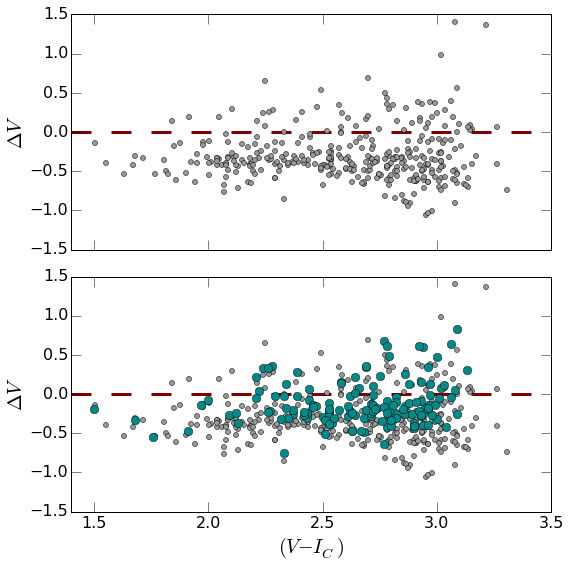

In [4]:
# redefine binary sequence
icurve = interp1d(binary_domain, binary_range, kind='slinear')

# trim the dataset to reasonable limits
irwin01 = np.column_stack((irwin01, DeltaVI))
ngc2516_new = np.array([star for star in ngc2516 if 1.4 < (star[1]-star[2]) < 3.33])
irwin01_new = np.array([star for star in irwin01 if 1.4 < (star[7]-star[8]+star[-1]) < 3.33])

# interpolate data points onto the binary curve
ngc2516_binary_expected = icurve(ngc2516_new[:,1] - ngc2516_new[:,2])
irwin01_binary_expected = icurve(irwin01_new[:,7] - irwin01_new[:,8] + irwin01_new[:,-1])

# calculate differences
ngc2516_diff = ngc2516_binary_expected - ngc2516_new[:,1]
irwin01_diff = irwin01_binary_expected - irwin01_new[:,7]

# plot differences
fig, ax = plt.subplots(2, 1, figsize=(8.0, 8.0), sharex=True)

ax[1].set_xlabel('$(V - I_C)$', fontsize=20.)
for axis in ax:
    axis.set_xlim(1.4, 3.5)
    axis.set_ylabel('$\\Delta V$', fontsize=20.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# showing only the Irwin data
ax[0].plot([1.4, 3.6], [0.0, 0.0], '-', lw=3, dashes=(20., 20.), c='#800000')
ax[0].plot((irwin01_new[:,7] - irwin01_new[:,8] + irwin01_new[:,-1]), irwin01_diff, 'o', ms=5.0, c='#999999')

# now both data sets
ax[1].plot([1.4, 3.6], [0.0, 0.0], '-', lw=3, dashes=(20., 20.), c='#800000')
ax[1].plot((irwin01_new[:,7] - irwin01_new[:,8] + irwin01_new[:,-1]), irwin01_diff, 'o', ms=5.0, c='#999999')
ax[1].plot((ngc2516_new[:,1] - ngc2516_new[:,2]), ngc2516_diff, 'o', ms=8.0, c='#008B8B')

fig.tight_layout()

There appear to be small offsets in the adopted $V$ magnitudes between the two studies, despite Jackson & Jeffries explicitly stating that they adopt the photometry of Irwin et al. (2007). We can, instead, simply adjust the cut-off criterion if we wish to remove potential binaries by incorporating the small offset uncertainty into the total ambiguity surrounding the binary sequence.

If we select out only the stars that lie +0.1 mag above the zero point in the above figure,

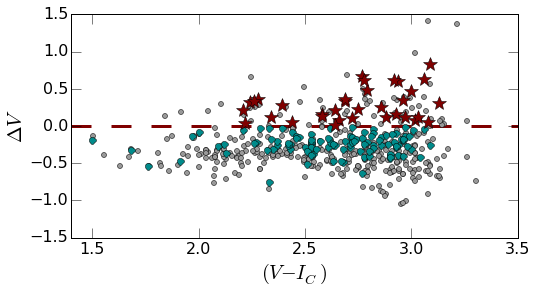

In [5]:
# flag binaries in J&J data
ngc2516_new = np.column_stack((ngc2516_new, ngc2516_diff))
ngc2516_bin = np.array([star for star in ngc2516_new if star[-1] >  0.0])
ngc2516_new = np.array([star for star in ngc2516_new if star[-1] <=  0.0])

# plot differences
fig, ax = plt.subplots(1, 1, figsize=(8.0, 4.0))

ax.set_xlabel('$(V - I_C)$', fontsize=20.)
ax.set_xlim(1.4, 3.5)
ax.set_ylabel('$\\Delta V$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=10., labelsize=16.)

# now both data sets
ax.plot([1.4, 3.6], [0.0, 0.0], '-', lw=3, dashes=(20., 20.), c='#800000')
ax.plot((irwin01_new[:,7] - irwin01_new[:,8] + irwin01_new[:,-1]), irwin01_diff, 'o', ms=5.0, c='#999999')
ax.plot((ngc2516_new[:,1] - ngc2516_new[:,2]), ngc2516_new[:,-1], 'o', ms=7.0, c='#008B8B')
ax.plot((ngc2516_bin[:,1] - ngc2516_bin[:,2]), ngc2516_bin[:,-1], '*', ms=14.0, c='#800000')

A selection criterion of 0.2 mag above the zero point corresponds to, approximately, a $3\sigma$ threshold. We could be conservative (in the sense of testing models) and remove stars beginning below 0.1 mag. The impact on the resulting mean radii can be probed later. ~~For now, we'll stick with our initial 0.2 mag criterion.~~ There may be better reason to adopt 0.0 as the threshold. Need to review the binary sequence definition later in Irwin+ (2007).

How does this affect the appearance of color magnitude diagrams?

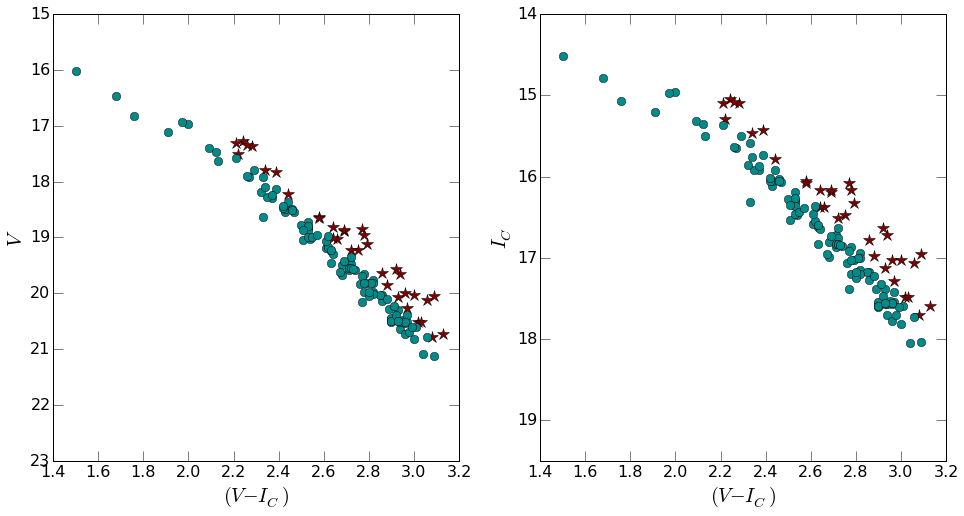

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.set_xlabel('$(V - I_C)$', fontsize=20.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_ylabel('$V$', fontsize=20.)
ax[1].set_ylabel('$I_C$', fontsize=20.)
ax[0].set_ylim(23., 15.)
ax[1].set_ylim(19.5, 14.)

ax[0].plot((ngc2516_bin[:,1] - ngc2516_bin[:,2]), ngc2516_bin[:,1], '*', lw=2, ms=12.0, c='#800000')
ax[1].plot((ngc2516_bin[:,1] - ngc2516_bin[:,2]), ngc2516_bin[:,2], '*', lw=2, ms=12.0, c='#800000')
ax[0].plot((ngc2516_new[:,1] - ngc2516_new[:,2]), ngc2516_new[:,1], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[1].plot((ngc2516_new[:,1] - ngc2516_new[:,2]), ngc2516_new[:,2], 'o', lw=2, ms=8.0,  c='#008B8B')

This has a strong affect on the CMDs of NGC 2516. Both display tighter sequences, as expected. Notably, removing binaries based on $V$-band magnitude removes suspected binaries flagged from visual inspection of the $I_C$-band magnitude.

How, then, are the radii (and mean radii) affected by the removal of binaries? First, radius-color figures.

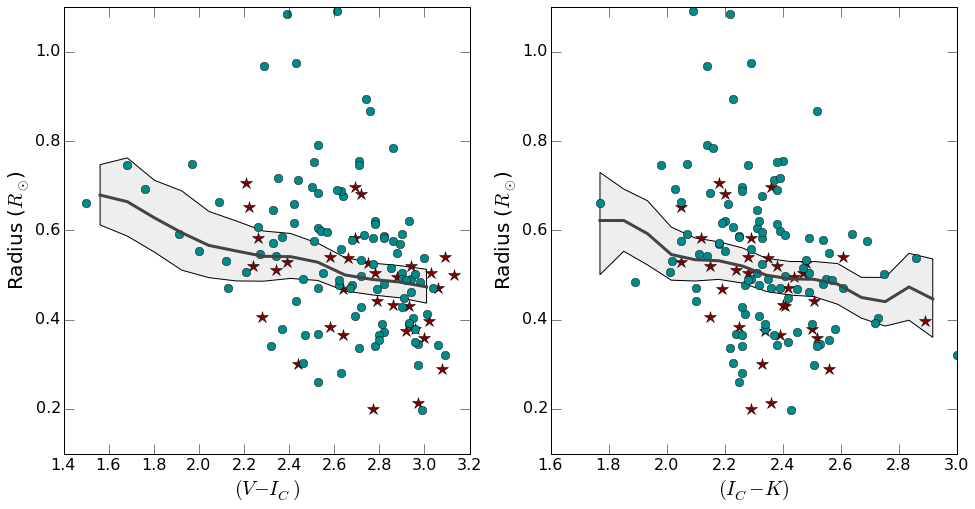

In [7]:
# load data with *OLD* mean values
mean_radii_VI = np.genfromtxt('data/ngc2516_avg_radii_V-I_v2.dat')
mean_radii_IK = np.genfromtxt('data/ngc2516_avg_radii_I-K_v2.dat')

fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.set_ylabel('Radius ($R_{\\odot}$)', fontsize=20.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_xlabel('$(V - I_C)$', fontsize=20.)
ax[1].set_xlabel('$(I_C - K)$', fontsize=20.)

ax[0].plot((ngc2516_bin[:,1] - ngc2516_bin[:,2]), ngc2516_bin[:,10], '*', lw=2, ms=12.0, c='#800000')
ax[0].plot((ngc2516_new[:,1] - ngc2516_new[:,2]), ngc2516_new[:,10], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[0].plot(mean_radii_VI[:,0], mean_radii_VI[:,1], '-', lw=3, c = '#444444')
ax[0].fill_between(mean_radii_VI[:,0], mean_radii_VI[:,2], mean_radii_VI[:,3], facecolor='#eeeeee')
ax[1].plot((ngc2516_bin[:,2] - ngc2516_bin[:,3]), ngc2516_bin[:,10], '*', lw=2, ms=12.0, c='#800000')
ax[1].plot((ngc2516_new[:,2] - ngc2516_new[:,3]), ngc2516_new[:,10], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[1].plot(mean_radii_IK[:,0], mean_radii_IK[:,1], '-', lw=3, c = '#444444')
ax[1].fill_between(mean_radii_IK[:,0], mean_radii_IK[:,2], mean_radii_IK[:,3], facecolor='#eeeeee')

Looking at the radius-color diagrams, there is a fairly even division of the binary stars about the previously determined mean values. This suggests that removing binaries would have only a minor impact on the mean radii as a function of photometric color.

And radius-magnitude,

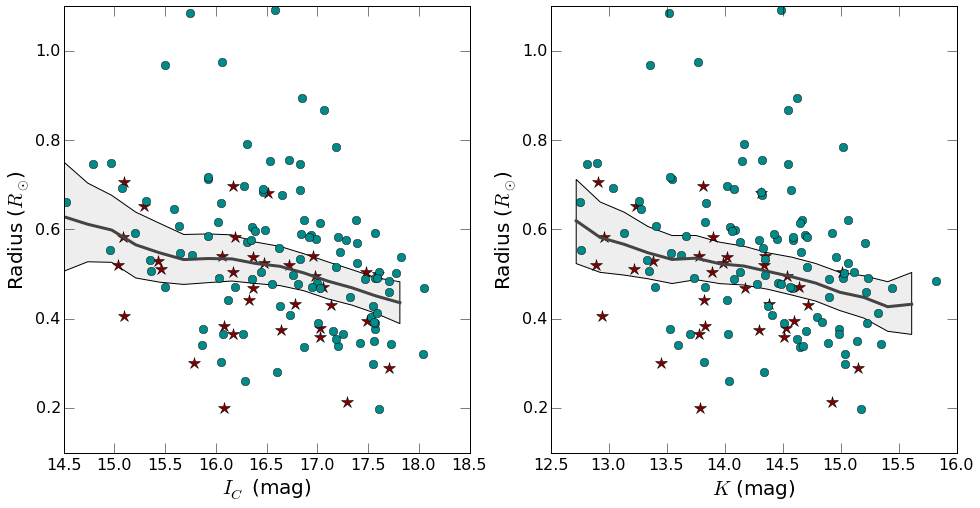

In [8]:
# load data with *OLD* mean values
mean_radii_I = np.genfromtxt('data/ngc2516_avg_radii_I_v2.dat')
mean_radii_K = np.genfromtxt('data/ngc2516_avg_radii_K_v2.dat')

fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.set_ylabel('Radius ($R_{\\odot}$)', fontsize=20.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_xlabel('$I_C$ (mag)', fontsize=20.)
ax[1].set_xlabel('$K$ (mag)', fontsize=20.)

ax[0].plot(ngc2516_bin[:,2], ngc2516_bin[:,10], '*', lw=2, ms=12.0, c='#800000')
ax[0].plot(ngc2516_new[:,2], ngc2516_new[:,10], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[0].plot(mean_radii_I[:,0], mean_radii_I[:,1], '-', lw=3, c = '#444444')
ax[0].fill_between(mean_radii_I[:,0], mean_radii_I[:,2], mean_radii_I[:,3], facecolor='#eeeeee')
ax[1].plot(ngc2516_bin[:,3], ngc2516_bin[:,10], '*', lw=2, ms=12.0, c='#800000')
ax[1].plot(ngc2516_new[:,3], ngc2516_new[:,10], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[1].plot(mean_radii_K[:,0], mean_radii_K[:,1], '-', lw=3, c = '#444444')
ax[1].fill_between(mean_radii_K[:,0], mean_radii_K[:,2], mean_radii_K[:,3], facecolor='#eeeeee')

This is quite interesting. Binaries appear to have estimated radii consistent with those from the single star population. It's therefore possible that removing binaries will increase the mean radii as a function of both magnitude, since the stars with the largest radii are considered to be among the single star population.

Does it make sense that binaries lie on the smaller side? Recall,

\begin{equation}
    \frac{R\sin i}{R_{\odot}} = 0.124 \frac{P}{2\pi} v\sin i,
\end{equation}

so the radius is proportional to both the rotational velocity and the rotational period. At a given magnitude, one would expect the average measured $v\sin i$ of a binary to be greater than for single stars. That would tend to increase the measurement of $R\sin i$ for a fixed orbital period. But, if the star has a brighter magnitude than it would if the two stars are single, then the adopted template spectrum for the binary system may be too early of a spectral type, leading to intrinsically broader spectral lines. This would tend to produce lower $v\sin i$ values. 

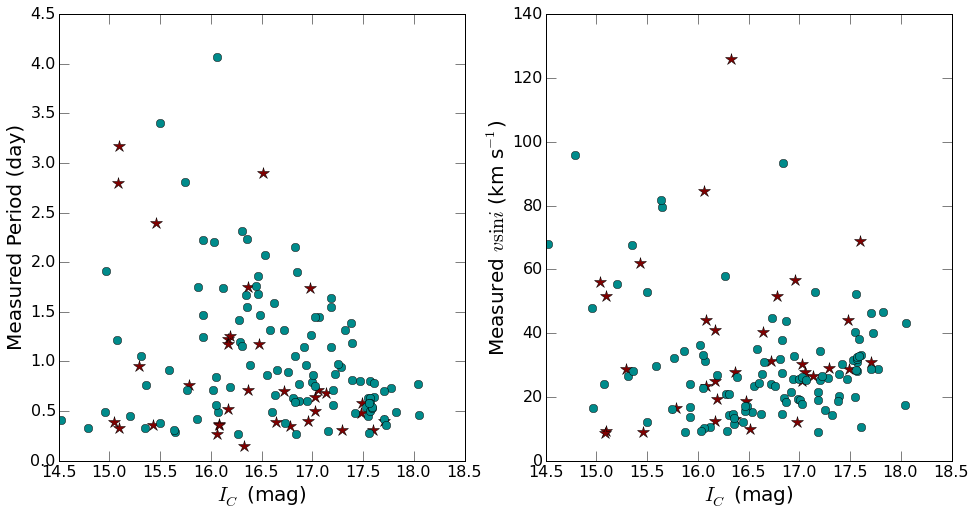

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_xlabel('$I_C$ (mag)', fontsize=20.)
ax[1].set_xlabel('$I_C$ (mag)', fontsize=20.)
ax[0].set_ylabel('Measured Period (day)', fontsize=20.)
ax[1].set_ylabel('Measured $v \\sin i$ (km s$^{-1}$)', fontsize=20.)

ax[0].plot(ngc2516_bin[:,2], ngc2516_bin[:,0], '*', lw=2, ms=12.0, c='#800000')
ax[0].plot(ngc2516_new[:,2], ngc2516_new[:,0], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[1].plot(ngc2516_bin[:,2], ngc2516_bin[:,7], '*', lw=2, ms=12.0, c='#800000')
ax[1].plot(ngc2516_new[:,2], ngc2516_new[:,7], 'o', lw=2, ms=8.0,  c='#008B8B')

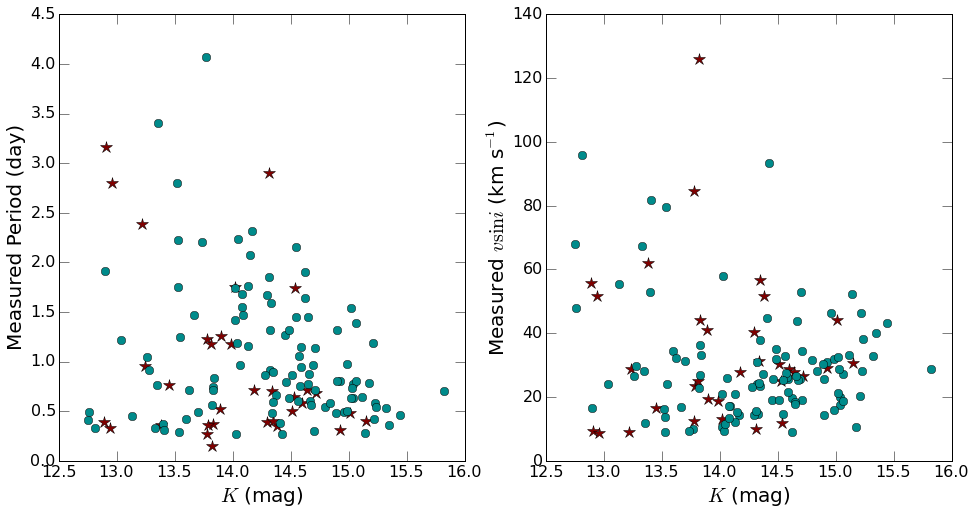

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16.0, 8.0))

for axis in ax:
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)
ax[0].set_xlabel('$K$ (mag)', fontsize=20.)
ax[1].set_xlabel('$K$ (mag)', fontsize=20.)
ax[0].set_ylabel('Measured Period (day)', fontsize=20.)
ax[1].set_ylabel('Measured $v \\sin i$ (km s$^{-1}$)', fontsize=20.)

ax[0].plot(ngc2516_bin[:,3], ngc2516_bin[:,0], '*', lw=2, ms=12.0, c='#800000')
ax[0].plot(ngc2516_new[:,3], ngc2516_new[:,0], 'o', lw=2, ms=8.0,  c='#008B8B')
ax[1].plot(ngc2516_bin[:,3], ngc2516_bin[:,7], '*', lw=2, ms=12.0, c='#800000')
ax[1].plot(ngc2516_new[:,3], ngc2516_new[:,7], 'o', lw=2, ms=8.0,  c='#008B8B')

Jackson et al. (2009) used two spectral templates: a K4.5 and an M6. If the switching of spectral templates was the root cause of lower $v\sin i$ values for some of the binary systems, we expect that there would be a noticeable distinction across the transition threshold, biasing $v \sin i$ measurements toward lower values for binaries _above_ the threshold magnitude where the template transition occurs. However, Jackson et al. note that 
> The $v \sin i$ values found using the two templates did not differ significantly, either on average of as a function of color.

Yet, there does appear to be a difference between the population of stars above and below 14.5 mag in $K$ and approximately 17.0 mag in $I_C$.